In [135]:
import numpy as np
import matplotlib.pyplot as plt

# ML from scratch
class hmm:
    def __init__(self,n,A,p,mu,sig):
        self.n = n
        self.A = A
        self.p = p
        self.mu = mu
        self.sig = sig
        self.h = [None]
        self.x = [None]
        self.steps = [None]
        
    def sample(self,steps):
        self.steps = steps
        self.h = np.random.choice(self.n, size=steps, p=self.p)
        self.x = np.random.normal(loc=self.mu[self.h[0]],scale=self.sig[self.h[0]],size=steps)
        for i in range(steps-1):
            self.h[i+1] = np.random.choice(self.n,size=1,p=self.A[:][self.h[i]])
            self.x[i+1] = np.random.normal(loc=self.mu[self.h[i+1]],scale=self.sig[self.h[i+1]],size=1)
        return self.h, self.x
    
    def fit(self,x_obs,delta_tol,iter_max):
        # initialized your marginals for hidden state
        self.steps = len(x_obs)
        self.h_marginal = np.zeros()
        delta_curr = np.zeros(1)
        iter_curr = 0
        while delta_curr>delta_tol or iter_curr>iter_max:
        # E-step:
            self.h_marginal = self._E_step(self.A, self.p, self.mu, self.sig)
        # M-step
            self.A, self.p, self.mu, self.sig = self.M_step(self.h_marginal)
            
            delta_curr = None # likelihood difference
            iter_curr+=1
        return self
    
    def _forward(self,):
        alpha = np.zeros(self.n,self.steps)
        for i in range(self.n):
            for t in range(self.steps):
                None
        return alpha
    
    def _backward(self,):
        beta = np.ones(self.n,self.steps)
        for i in range(self.n):
            for t in range(self.steps):
                None
        return beta
    
    def _M_step(self,):
        alpha = self._forward()
        beta = self._backward()
        h_marginals = np.multiply(alpha,beta)
        return h_marginals
    
    def _E_step(self,):
        A = None
        p = None
        mu = None
        sig = None
        return A,p,mu,sig

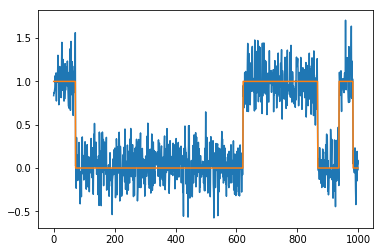

In [134]:
A = [[0.99,0.01],[0.01,0.99]]
p = [0.1,0.9]
mu = [0,1]
sig = [0.2,0.2]
myhmm = hmm(2,A,p,mu,sig)
h,x = myhmm.sample(1000)
plt.plot(x)
plt.plot(h)
plt.show()